# 01. 순환 신경망 (RNN & LSTM)
> 순환신경망 (RNN)에 대해 알아봅시다.

- toc: true 
- badges: true
- comments: true
- categories: [Day 7]
- permalink: /rnn_lstm
- exec: colab

### 1. RNN as Auto Regressive Model

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/reg05.png?raw=true)
 
우리는 이미 회귀모델 시간에 '자기 종속성'이라는 속성에 대해 이야기 한적이 있습니다. 자기종속성이란 이전 타임스텝의 출력이 다음 타임스텝의 입력에 영향을 준다는 속성입니다. 우리가 오늘 배울 RNN이라는 신경망은 바로 이러한 자기 종속성을 다층 퍼셉트론으로 모델링한 구조입니다. <br><br>

음악, 동영상, 에세이, 시, 소스 코드, 주가 차트. 이것들의 공통점은 무엇일까요? 바로 **시간적인 순서를 갖는 시퀀스**라는 점입니다. 음악은 음계들의 시퀀스, 동영상은 이미지의 시퀀스, 에세이는 단어들의 시퀀스로 볼 수 있습니다. 시퀀스의 길이는 가변적입니다. 소설에는 한 페이지짜리 단편소설도 있고 열권짜리 장편소설도 있죠. 기존의 뉴럴 네트워크 알고리즘은 고정된 크기의 입력을 다루는 데는 탁월하지만, 가변적인 크기의 데이터를 모델링하기에는 적합하지 않습니다. <br><br>

RNN(Recurrent Neural Network, 순환신경망)은 **시퀀스 데이터를 모델링 하기 위해 등장**했습니다. RNN이 기존의 뉴럴 네트워크와 다른 점은 **‘기억’(다른 말로 hidden state)을 갖고 있다는 점**입니다. 네트워크의 기억은 지금까지의 입력 데이터를 요약한 정보라고 볼 수 있습니다. 새로운 입력이 들어올때마다 네트워크는 자신의 기억을 조금씩 수정합니다. 결국 입력을 모두 처리하고 난 후 네트워크에게 남겨진 기억은 시퀀스 전체를 요약하는 정보가 됩니다. 이는 사람이 시퀀스를 처리하는 방식과 비슷합니다. 이 글을 읽을 때도 우리는 이전까지의 단어에 대한 기억을 바탕으로 새로운 단어를 이해합니다. <br><br>

이 과정은 새로운 단어마다 계속해서 반복되기 때문에 RNN에는 Recurrent, 즉 순환적이라는 이름이 붙습니다. RNN은 이런 반복을 통해 아무리 긴 시퀀스라도 처리할 수 있는 것입니다. <br><br>

![](https://files.slack.com/files-pri/T25783BPY-F6YUKQKCP/rnn-diagram.png?pub_secret=9e9b7d3f1e)

위 다이어그램에서 빨간색 사각형은 입력, 노란색 사각형은 기억, 파란색 사각형은 출력을 나타냅니다. 첫번째 입력이 들어오면 첫번째 기억이 만들어집니다. 두번째 입력이 들어오면 기존의 기억과 새로운 입력을 참고하여 새 기억을 만듭니다. 입력의 길이만큼 이 과정을 얼마든지 반복할 수 있습니다. 각각의 기억은 그때까지의 입력을 요약해서 갖고 있는 정보입니다. RNN은 이 요약된 정보를 바탕으로 출력을 만들어 냅니다. <br><br>

### 2. What can RNNs do?

RNN의 입력과 출력은 우리가 네트워크에게 시키고 싶은 것이 무엇이냐에 따라 얼마든지 달라질 수 있습니다. 아래는 몇가지 예시입니다. <br><br>

#### 2.1. 시계열 예측(e.g. 주가 예측)
![](https://t1.daumcdn.net/cfile/tistory/99C2D5465C66628B13)

주가예측과 같은 시계열 예측 문제를 RNN으로 풀어볼 수 있습니다. 주가예측의 경우 이전 시간의 주가가 다음 시간의 주가에 영향을 주기 때문에 Auto regressive model인 RNN을 사용해서 문제를 풀어볼 수 있는 것입니다. 
<br><br>

#### 2.2. 자연어 처리(e.g. 기계 번역)

![](https://files.slack.com/files-pri/T25783BPY-F6X6W5UTA/machine-translator.png?pub_secret=c4b0c11754)

구글의 번역기와 네이버의 파파고와 같은 자연어처리 시스템들은 RNN을 응용한 모델로 만들어졌습니다. RNN 기반 모델은 기존 통계 기반 모델의 비해 우수한 성능을 낸다고 알려져 있습니다. 자연어 역시 마찬가지로 이전 단어에 의해 다음 단어가 결정되므로 RNN을 사용할 수 있는 것입니다. <br><br>

#### 2.3. 음성 처리(e.g. 음성 인식)

![](https://file.hstatic.net/1000400311/file/chuyen_van_ban_thanh_giong_noi_c72b34f374f646e7891357808323eee2.jpg)

대부분의 음성처리 시스템들도 RNN을 기반으로 만들어진 것으로 알려졌습니다. 소리 역시 이전 소리가 다음 소리에 영향을 주기 때문에, 이러한 관계를 모델링하기 위해 RNN을 사용합니다.
<br><br>

### 3. More Details in RNN

![](https://t1.daumcdn.net/cfile/tistory/261D7C4757AC186F04)

RNN은 sequence data를 처리하는 모델입니다. sequence는 순서대로 처리해야 하는 것을 뜻하고, 이런 데이터에는 시계열 처리, 음성인식, 자연어처리 등이 포함됩니다. 자연어의 경우 단어 하나만 안다고 해서 처리될 수 없고, 앞뒤 문맥을 함께 이해해야 해석이 가능하기 때문입니다. 이러한 작업은 적어도, 지금까지 열심히 공부한 neural network나 다양한 머신러닝 모델들, 앞으로 배울 CNN으로도 이렇게 시간적인 특성을 가르치는 것은 불가능합니다. <br><br>

![](https://t1.daumcdn.net/cfile/tistory/2578204757AC186F2A)

위 그림에서 보면 $x_t$가 입력되어서 히든레이어 $A$를 거쳐서 최종적으로 $h_t$라는 출력을 반환하게 됩니다. 이것만 보면 이전에 배운 다층 퍼셉트론(MLP)와 차이가 없습니다. 그러나 RNN의 특징은 저기에 있는 순환구조의 화살표에 있습니다. 저 화살표는 히든레이어인 $A$에서 나와서 다시 히든레이어 $A$로 들어갑니다. 이 것을 간단하게 표현하기 위해 시간순으로 펼쳐서(unfold) 오른쪽 처럼도 표현할 수 있습니다. 이렇게 보면 시간의 흐름에 따라 같은 모양의 신경망이 마치 복사된 것처럼 느껴집니다
<br><br>

![](https://t1.daumcdn.net/cfile/tistory/2201424757AC187023)

RNN(Recurrent Neural Network)은 일반적으로 step을 거칠 때마다 어떤 결과를 예측하게 됩니다. 그리고, 이런 예측 값을 앞에서 배웠던 것처럼 y라고 부릅니다. y = Wx + b와 같이 생각하시면 됩니다. 그리고 RNN에서는 y 대신에 h를 자주 사용하는 편입니다. 따라서 저도 h로 놓고 설명드리도록 하겠습니다.
<br><br>

![](https://t1.daumcdn.net/cfile/tistory/271F9B4757AC187002)

수식으로 표현하면 위와 같습니다. 새로운 출력인 $h_t$는 이전의 출력인 $h_{t-1}$과 새로운 입력 $x_t$이 입력되어 나온 출력입니다.  여기서 노드 갯수는 layer에 포함된 노드(그림에서는 초록색으로 표시된 RNN) 갯수를 말합니다. <br><br>

![](https://t1.daumcdn.net/cfile/tistory/21140B4757AC18710F)

수식을 좀 더 자세히 보겠습니다. 오른쪽 그림에서 가장 먼저 $x_0$이 입력됩니다. 그러면 히든레이어 $A$를 거쳐서 $h_0$이 출력됩니다. 그리고 나서 그 다음 타임스텝의 사건이 $x_1$으로 입력됩니다. 그러면 RNN 모델은 현재 타임스텝의 입력인 $x_1$과 이전 타임스텝까지 저장하고 있던 출력$h_0$을 다시 히든레이어에 입력합니다. 그래서 이 둘이 더해져서 현재 타임스텝인 $h_1$가 완성됩니다. 이를 수식으로 표현하면 아래와 같습니다.

<br>
$$h_1 = activation(w_x \cdot x_1 + w_h \cdot h_0)$$
<br><br>

![](https://t1.daumcdn.net/cfile/tistory/274D224F57AC187225)

이 때, $x$와 $h$가 입력될 때, 각각 $w_x$와 $w_h$가 곱해지고나서 더해지는데, 이들이 바로 RNN의 가중치입니다. 한가지 주의할 점은 매 타임스텝마다 다른 $w$들이 있는 것이 아니라, $w$는 $w_x$와 $w_h$로 딱 2개만 존재하고, 매 타임스텝마다 들어오는 입력들이 매번 같은 weight와 곱해진다는 것입니다. 


<br>

### 4. RNN의 학습 알고리즘 : BPTT

RNN은 기존 신경망의 역전파(backprop)와는 달리 타임 스텝별로 네트워크를 펼친 다음, 역전파 알고리즘을 사용하는데 이를 BPTT(BackPropagation Through Time)라고 합니다. 

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile23.uf.tistory.com%2Fimage%2F99DB59465BD2ACC420D345)

BPTT 또한 일반적인 역전파와 같이 먼저 순전파(forward prop)로 각 타임 스텝별 시퀀스를 출력합니다. 그런다음 이 출력 시퀀스와 손실(비용)함수를 사용하여 각 타임 스텝별 Loss를 구합니다. 그리고 손실 함수의 그래디언트는 위의 그림과 같이 펼쳐진 네트워크를 따라 역방향으로 전파됩니다. BPTT는 그래디언트가 마지막 타임 스텝인 출력뿐만 아니라 손실함수를 사용한 모든 출력에서 역방향으로 전파됩니다.  

RNN은 각 타임 스텝마다 같은 매개변수 $W$와 $b$이 사용되기 때문에 역전파가 진행되면서 모든 타임 스텝에 걸쳐 매개변수 값이 합산됩니다. 이렇게 업데이트된 가중치는 순전파 동안에는 모든 타임 스텝에 동일한 가중치가 적용됩니다.
<br><br>

#### 4.1. BPTT의 문제점

BPTT는 RNN에서의 역전파 방법인 BPTT(BackPropagation Through Time)은 위의 그림과 같이 모든 타임스텝마다 처음부터 끝까지 역전파합니다. 그렇기 때문에 타임 스텝이 클 경우, 위의 그림과 같이 RNN을 펼치게(unfold)되면 매우 깊은 네트워크가 될것이며, 이러한 네트워크는 05-1. 심층 신경망 학습에서 살펴본 그래디언트 소실 및 폭주(vanishing & exploding gradient) 문제가 발생할 가능성이 큽니다. 그리고, 계산량 또한 많기 때문에 한번 학습하는데 아주 오랜 시간이 걸리는 문제가 있습니다.
<br><br>

#### 4.2. Truncated BPTT

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile29.uf.tistory.com%2Fimage%2F99E13D3E5BD5F5AC0314BB)

BPTT의 이러한 문제를 해결하기 위해 아래의 그림과 같이 타임 스텝을 일정 구간(보통 5-steps)으로 나누어 역전파(backprop)를 계산하여, 전체 역전파로 근사시키는 방법인 Truncated BPTT를 대안으로 사용할 수 있습니다. BPTT의 이러한 문제를 해결하기 위해 아래의 그림과 같이 타임 스텝을 일정 구간(보통 5-steps)으로 나누어 역전파(backprop)를 계산하여, 전체 역전파로 근사시키는 방법인 Truncated BPTT를 대안으로 사용할 수 있습니다. 
<br><br>


### 5. LSTM (Long Short Term Memory)

RNN의 장점은 이전의 정보를 공유하여 활용할 수 있다는 것입니다. 하지만, 시점간의 간격(Gap)이 크지 않을 경우에 가능하며 이러한 문제의 원인은 Vanishing Gradient에서 알 수 있듯이 BPTT에서 Chain Rule에 의해 [-1, 1]사이의 값들이 계속 곱해지다보니 앞쪽으로 갈 수록 그 값이 작아져, 결국에는 소멸해버려 Parameter들의 업데이트가 되지 않는 문제가 발생하기 때문입니다.
이러한 문제를 해결하기 위해 등장한 것이 바로 LSTM입니다.

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile26.uf.tistory.com%2Fimage%2F2270DB4B592AE7E12C854F)

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile1.uf.tistory.com%2Fimage%2F26698E4F592AE818420518)

<br>

LSTM(Long Short Term Meomory networks)는 RNN의 한 종류입니다. LSTM은 장기 의존성 문제를 해결할 수 있으며 Hochreiter(1997)가 제안한 알고리즘입니다.
아래의 그림을 통해 기존 RNN과 LSTM차이를 살펴보도록 합시다.

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile22.uf.tistory.com%2Fimage%2F2145AC4E592AE84229EBFF)

기존의 RNN은 Hidden Layer에서 Hidden State(St)를 계산할 때 단순히 St=tanh(Uxt+WSt)로 계산하였지만, LSTM에서는 총 4가지의 계산과정이 있습니다.
아래의 LSTM의 Hidden Layer에서 볼 수 있듯이 Neural Network Layer가 4개가 존재한다고 봐도 무방하다. 각각에 대해 자세히 알아 보도록 합시다.

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile28.uf.tistory.com%2Fimage%2F22023B4F592AE8B6173AE9)

#### 5.1. Cell State

LSTM의 핵심이라고 할 수 있는 이 Cell State는 아래의 그림4에서 볼 수 있듯이, 단순한 연산(곱셉, 덧셈)을 거쳐 LSTM Unit(초록색 박스)을 통과합니다. 이러한 Cell State를 통해 이전 정보(Ct−1)는 큰 변화 없이 다은 단계로 전달됩니다.

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile8.uf.tistory.com%2Fimage%2F2532104B592AE95F161BBF)

Cell State는 input, forget, output 세 개의 게이트(gate)들을 이용하여 정보의 반영 여부를 결정해줍니다. 각 게이트 들은 그림4에서 볼 수 있듯이 simgmoid 와 곱셈으로 이루어져 있습니다. Simgmoid 는 0<σ<1의 값을 출력해 각 정보가 어느정도로 영향을 줄 것인지 결정하는 역할을 합니다. LSTM은 Cell State를 컨트롤하기 위해 세가지 게이트(gate)들로 이루어져있습다. LSTM의 세가지 게이트들의 핵심은 아래와 같습니다.

- 무엇을 쓰고 > input gate
- 무엇을 읽고 > out gate
- 무엇을 잊을 것인가 forget gate
<br><br>

#### 5.2. LSTM의 단계

- 1) Forget Gate

LSTM의 첫번째 단계는 어떠한 정보를 반영할지에 대한 결정을 하는 게이트입니다. 이러한 결정은 sigmoid layer통해 이루어집니다. ht−1과 xt를 입력값으로 받아 sigmoid활성화 함수를 통해 0 ~ 1사이의 값을 출력합니다. 1에 가까울 수록 정보의 반영을 많이하고, 0에 가까울 수록 해당 정보의 반영을 적게한다는 의미입니다.

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile23.uf.tistory.com%2Fimage%2F25722347592AE9A32F3834)

<br>

- 2) Input Gate

두번쨰 단계는 새로운 정보가 Cell State에 저장이 될지를 결정하는 게이트입니다. Input Gate에는 두개의 Layer가 있는데, 하나는 sigmoid layer로 (이 레이어를 input gate라고 함) 어떤 값을 업데이트 할 것인지 결정하는 레이어입니다. 다른하나는 tanh layer로 구성되어 있으며, Cell State에 더해질 vector of new candidate values(후보값들의 벡터)를 만드는 레이어(Update gate)입니다.

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F2163D94F592AE9CF1F4547)

<br>

- 3) Update Cell State

이렇게 forget gate와 input gate에서 출력된 값들을 Cell State Ct−1를 Ct 로 업데이트해줍니다.

- ft⋅Ct−1 계산 해준뒤
- it⋅Ct 를 더해줍니다. 최종 Ct의 식은 아래의 그림과 같다.

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile6.uf.tistory.com%2Fimage%2F2158E350592AE9F10EBB26)

<br>

- 4) Output Gate Layer

마지막 단계는 출력값(ht)을 결정하는 단계입니다. ht는 Cell State(Ct)를 필터링해준 값입니다. 먼저, 출력할 Cell State의 부분을 결정하는 sigmoid layer를통해 계산합니다(ot). 그런다음, 앞 단계에서 업데이트 된 Cell State(Ct)를 **tanh**를 통해 -1 ~ 1사이로 출력된 값을 곱해줍니다.

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile5.uf.tistory.com%2Fimage%2F220BB84B592AEA1B1EDAB1)

<br>

LSTM은 위와 같은 메커니즘을 이용하여 RNN의 장기기억 문제를 효과적으로 해결하였고 매우 높은 성능을 보여주는 네트워크가 되었습니다. 이제 이 LSTM을 가지고 실습을 진행해보도록 하겠습니다.

<br>

### 6. RNN(LSTM)으로 시계열 예측(주가 예측)을 해보자.

백문이 불여 일견이죠. RNN에 대해 어느정도 이해하셨다면 코드로 구현해봅시다. 우리는 여기에서 시계열 예측 문제 중 하나인 주가 예측 문제를 풀어보려고합니다. 이 문제의 경우 정답열이 연속적이기 때문에 Regression 예제입니다.

#### 6.1. 데이터 로딩

In [12]:
import pandas as pd

df_price = pd.read_csv('https://raw.githubusercontent.com/gusdnd852/bigdata-lecture/master/_notebooks/sample_data/samsung.csv', encoding='utf8')
df_price

ERROR! Session/line number was not unique in database. History logging moved to new session 440


,일자,시가,고가,저가,종가,거래량
0,20200107,55700,56400,55600,55800,9893846
1,20200106,54900,55600,54600,55500,10278951
2,20200103,56000,56600,54900,55500,15422255
3,20200102,55500,56000,55000,55200,12993228
4,20191230,56200,56600,55700,55800,8356767
...,...,...,...,...,...,...
9283,19850109,126,126,122,123,324836
9284,19850108,129,129,127,127,845098
9285,19850107,129,130,128,129,771895
9286,19850105,129,129,128,128,108496


컬럼은 [일자, 시가, 고가, 저가, 종가, 거래량]으로 구성된 매우 단순한 데이터 셋입니다. 총 9,288개의 row로 구성되어 있네요. 우리는 일자, 시가, 고가, 저가, 거래량을 토대로 미래의 주가인 “종가”를 예측해 보도록 하겠습니다.

#### 6.2. 데이터 전처리

In [13]:
pd.to_datetime(df_price['일자'], format='%Y%m%d')
# 0      2020-01-07
# 1      2020-01-06
# 2      2020-01-03
# 3      2020-01-02
# 4      2019-12-30

df_price['일자'] = pd.to_datetime(df_price['일자'], format='%Y%m%d')
df_price['연도'] =df_price['일자'].dt.year
df_price['월'] =df_price['일자'].dt.month
df_price['일'] =df_price['일자'].dt.day

In [14]:
df_price

,일자,시가,고가,저가,종가,거래량,연도,월,일
0,2020-01-07,55700,56400,55600,55800,9893846,2020,1,7
1,2020-01-06,54900,55600,54600,55500,10278951,2020,1,6
2,2020-01-03,56000,56600,54900,55500,15422255,2020,1,3
3,2020-01-02,55500,56000,55000,55200,12993228,2020,1,2
4,2019-12-30,56200,56600,55700,55800,8356767,2019,12,30
...,...,...,...,...,...,...,...,...,...
9283,1985-01-09,126,126,122,123,324836,1985,1,9
9284,1985-01-08,129,129,127,127,845098,1985,1,8
9285,1985-01-07,129,130,128,129,771895,1985,1,7
9286,1985-01-05,129,129,128,128,108496,1985,1,5


1990년도 이후의 주가를 시각화 해보겠습니다.

Text(0, 0.5, 'price')

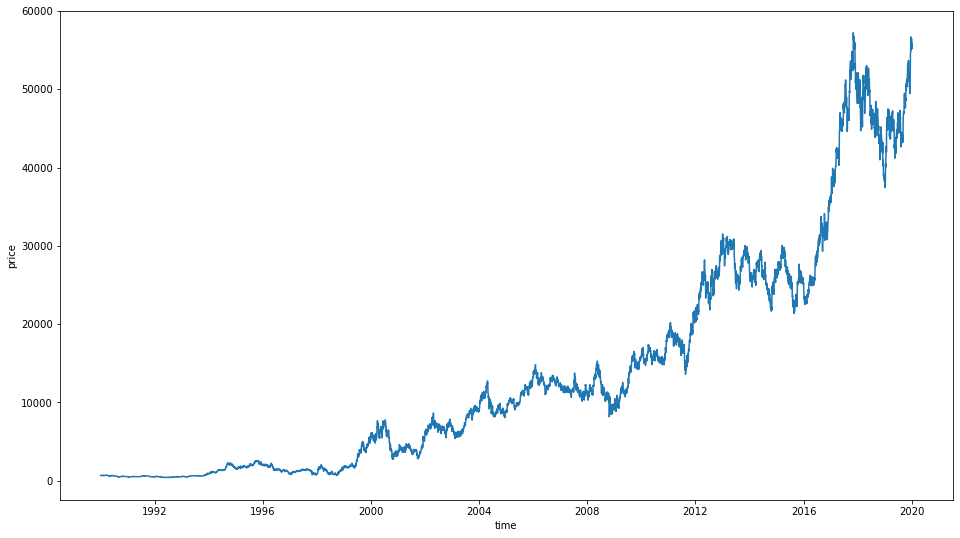

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns


df = df_price.loc[df_price['연도']>=1990]

plt.figure(figsize=(16, 9))
sns.lineplot(y=df['종가'], x=df['일자'])
plt.xlabel('time')
plt.ylabel('price')

데이터를 표준화합니다. sklearn의 `StandardScaler`를 이용하였습니다.

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['시가', '고가', '저가', '종가', '거래량']
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

            시가        고가        저가        종가       거래량
0     0.968482  0.980394  0.979423  0.975012  0.030291
1     0.954474  0.966389  0.961684  0.969733  0.031470
2     0.973735  0.983895  0.967005  0.969733  0.047217
3     0.964980  0.973391  0.968779  0.964454  0.039781
4     0.977237  0.983895  0.981197  0.975012  0.025585
...        ...       ...       ...       ...       ...
7823  0.005095  0.005094  0.005073  0.004927  0.002960
7824  0.005165  0.005129  0.005215  0.005068  0.005279
7825  0.005236  0.005199  0.005162  0.005015  0.005483
7826  0.005236  0.005339  0.005286  0.005279  0.008384
7827  0.004955  0.005129  0.004860  0.005138  0.005251

[7828 rows x 5 columns]


학습을 시킬 데이터 셋을 생성합니다. 여기서 window_size를 정의하여 학습 데이터를 생성할 예정입니다. window_size는 내가 얼마동안(기간)의 주가 데이터에 기반하여 다음날 종가를 예측할 것인가를 정하는 parameter 입니다. 즉 내가 과거 20일을 기반으로 내일 데이터를 예측한다라고 가정했을 때는 window_size=20이 됩니다. <br><br>

저는 과거 20일을 기준으로 그 다음날의 데이터를 예측해 보도록 하겠습니다. TEST_SIZE = 200은 학습은 과거부터 200일 이전의 데이터를 학습하게 되고, TEST를 위해서 이후 200일의 데이터로 모델이 주가를 예측하도록 한 다음, 실제 데이터와 오차가 얼마나 있는지 확인해 보도록 하겠습니다.

In [18]:
split = int(len(df_scaled) * 0.8)

train = df_scaled[:split]
test = df_scaled[split:]

In [19]:
import numpy as np

def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [20]:
feature_cols = ['시가', '고가', '저가', '거래량']
label_cols = ['종가']

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

In [21]:
train_feature, train_label = make_dataset(train_feature, train_label, 20)
test_feature, test_label = make_dataset(test_feature, test_label, 20)

<br>

#### 6.3. 모델링 (LSTM)

LSTM 모델을 생성합니다.

In [94]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.regularizers import l2


class StockPriceNetwork(Model):

    def __init__(self):
        super().__init__()
        self.hidden_layer = LSTM(16, 
                               activation='relu',
                               kernel_regularizer=l2(0.01),
                               kernel_initializer='he_normal',
                               return_sequences=False,
                               input_shape=(train_feature.shape[1], train_feature.shape[2]))

        self.output_layer = Dense(1,
                                  kernel_regularizer=l2(0.01),
                                  kernel_initializer='he_normal',)

    def call(self, x):
        x = self.hidden_layer(x)
        x = self.output_layer(x)
        return x
    

In [95]:
net = StockPriceNetwork()
net.build((None, train_feature.shape[1], train_feature.shape[2]))
net.summary()

Model: "stock_price_network_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                multiple                  1344      
_________________________________________________________________
dense_10 (Dense)             multiple                  17        
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________


In [112]:
net.compile(loss='mean_squared_error', optimizer='adam')
net.fit(train_feature, train_label, epochs=10, batch_size=16)

Epoch 1/5
391/391 [==============================] - 20s 52ms/step - loss: 6.2524e-04
Epoch 2/5
391/391 [==============================] - 20s 52ms/step - loss: 6.6533e-04
Epoch 3/5
391/391 [==============================] - 21s 53ms/step - loss: 5.6335e-04
Epoch 4/5
391/391 [==============================] - 21s 53ms/step - loss: 6.1914e-04
Epoch 5/5
391/391 [==============================] - 20s 51ms/step - loss: 5.8727e-04


In [105]:
pred = net.predict(test_feature)
pred

array([[0.02096493],
       [0.02078937],
       [0.02060248],
       ...,
       [0.00597665],
       [0.00598183],
       [0.00598907]], dtype=float32)

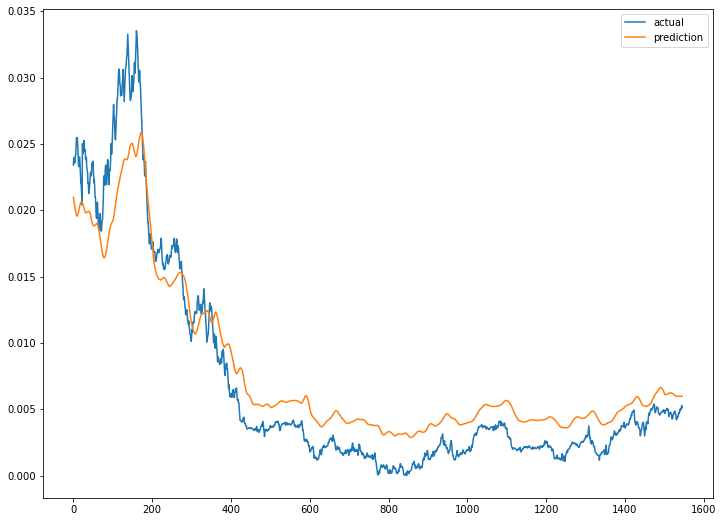

In [111]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()